In [4]:
import pandas as pd

file = pd.read_csv('clustering_data.csv', dtype={9: str})

DATA VISUALISATION

C:\Users\rishi\AppData\Local\Temp\ipykernel_1224\3980571765.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_file['Latitude'] = pd.to_numeric(filtered_file['Latitude'], errors='coerce')
C:\Users\rishi\AppData\Local\Temp\ipykernel_1224\3980571765.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_file['Longitude'] = pd.to_numeric(filtered_file['Longitude'], errors='coerce')


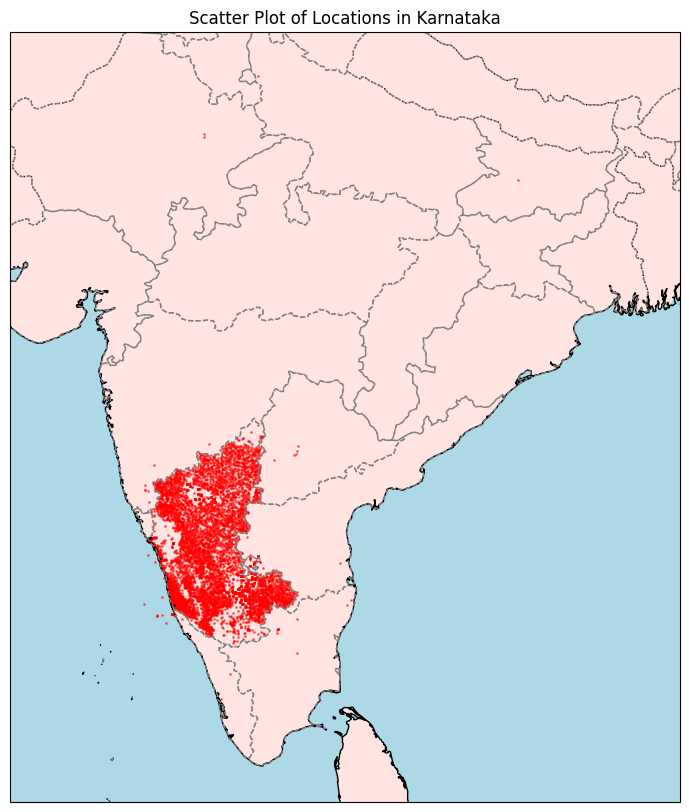

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# this is used to draw borders, ocean, land etc
import cartopy.crs as ccrs
# this is used to draw borders, ocean, land etc
import cartopy.feature as cfeature


# Only includes rows where the CircleName is KarnatakaCircle
filtered_file = file[file['CircleName'] == 'Karnataka Circle']

# converts all latitude, longitude values to numeric
filtered_file['Latitude'] = pd.to_numeric(filtered_file['Latitude'], errors='coerce')
filtered_file['Longitude'] = pd.to_numeric(filtered_file['Longitude'], errors='coerce')
# removes any row where latitude or longitude is missing
file_cleaned = filtered_file.dropna(subset=['Latitude', 'Longitude'])

latitudes = file_cleaned['Latitude']
longitudes = file_cleaned['Longitude']

# Plot map
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
#Set extent around Karnataka (approximate bounds)
ax.set_extent([70, 90, 7, 30], crs=ccrs.PlateCarree())

# To draw coastlines
ax.coastlines(resolution='10m')
# to draw country borders with dotted lines
ax.add_feature(cfeature.BORDERS, linestyle=':')
# to draw state boundaries inside India with gray color
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='gray')
# Land area is light pink and water areas are light blue
ax.add_feature(cfeature.LAND, facecolor='MistyRose')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot points
ax.scatter(longitudes, latitudes, color='red', s=1, transform=ccrs.PlateCarree(), alpha=0.5)

# Title and display
plt.title('Scatter Plot of Locations in Karnataka')
plt.show()


The above plot is for all points in the Karanataka Circle. You can see that most points are clustered in one specific region.


DATA PREPROCESSING- removed the very far off points from the data frame


C:\Users\rishi\AppData\Local\Temp\ipykernel_1224\3872858657.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_file['Latitude'] = pd.to_numeric(filtered_file['Latitude'], errors='coerce')
C:\Users\rishi\AppData\Local\Temp\ipykernel_1224\3872858657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_file['Longitude'] = pd.to_numeric(filtered_file['Longitude'], errors='coerce')
C:\Users\rishi\AppData\Local\Temp\ipykernel_1224\3872858657.py:13: SettingWithCopyWarning: 
A value is trying to

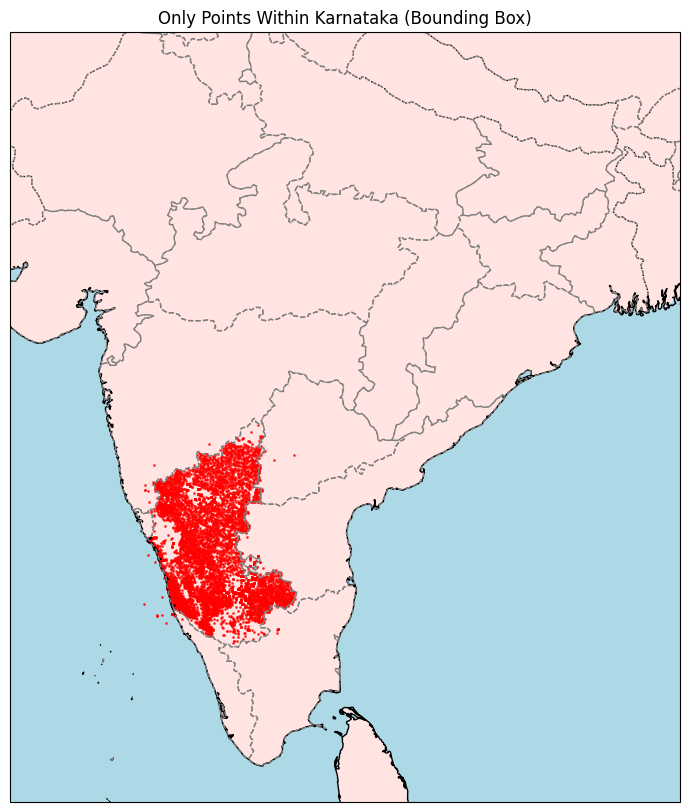

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Filter for Karnataka Circle
filtered_file = file[file['CircleName'] == 'Karnataka Circle']

# Convert to numeric
filtered_file['Latitude'] = pd.to_numeric(filtered_file['Latitude'], errors='coerce')
filtered_file['Longitude'] = pd.to_numeric(filtered_file['Longitude'], errors='coerce')
filtered_file.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Karnataka approx boundaries
lat_min, lat_max = 11.5, 18.5
lon_min, lon_max = 74, 78.5


# It keeps only the rows where the latitude and longitude are within the rectangle defined above.
filtered_file = filtered_file[
    (filtered_file['Latitude'] >= lat_min) &
    (filtered_file['Latitude'] <= lat_max) &
    (filtered_file['Longitude'] >= lon_min) &
    (filtered_file['Longitude'] <= lon_max)
]

# Extract lat/lon
latitudes = filtered_file['Latitude']
longitudes = filtered_file['Longitude']

# Plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([70,90,7,30], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')
# to draw country borders with dotted lines
ax.add_feature(cfeature.BORDERS, linestyle=':')
# to draw state boundaries inside India with gray color
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='gray')
# Land area is light pink and water areas are light blue
ax.add_feature(cfeature.LAND, facecolor='MistyRose')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

ax.scatter(longitudes, latitudes, color='red', s=1, transform=ccrs.PlateCarree(), alpha=0.7)
plt.title('Only Points Within Karnataka (Bounding Box)')
plt.show()

lat_lon = filtered_file[['Latitude', 'Longitude']].to_numpy()



k-means algorithm

In [122]:
import numpy as np

def k_means(X, k, max_iters=100, tolerance=1e-4):
    #randomly choose k centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    # prev_centroids is for comparison during convergence. If centroids = prev_centroids then no point in continuing the process.
    prev_centroids = np.zeros_like(centroids)
    # labels stores the cluster assignment (from 0 to k-1) for each point.
    labels = np.zeros(X.shape[0])
    
    for i in range(max_iters):
        # Assign points to nearest centroid
        for j in range(X.shape[0]):
            # for each point, stores the distances from every centroid and assigns it's label to the nearest centroid(least distance)
            distances = np.linalg.norm(X[j] - centroids, axis=1)
            labels[j] = np.argmin(distances)
        
        
        
        new_centroids = []
        for i in range(k):
            cluster_points = X[labels == i] #all the points belonging to on ecluster
            centroid = cluster_points.mean(axis = 0) #assigns the new centroid as the mean of all points
            new_centroids.append(centroid)
        new_centroids = np.array(new_centroids)     

        #Check for convergence
        # checks whether the difference ebwteen the new and old clusters is less than the tolerance
        # if it is then no need for new centroids so breaks the loop
        if np.all(np.abs(new_centroids - centroids) <= tolerance):
            break
        
        centroids = new_centroids

    #Calculate  WCSS score for points in each cluster
    wcss = 0
    for i in range(k):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - centroids[i])**2)
    
    return centroids, labels, wcss


how to choose best possible k

Elbow method:  
 Run k-means from 1-10  
 calculate WCSS for each k.  
 WCSS is sum of squared distances between each point. As k increases, WCSS decreases.  
 Plot graph between WCSS and corresponding k values.  
 Point where the graph has a sharp turn is called the elbow, k at that point is the best possible k.


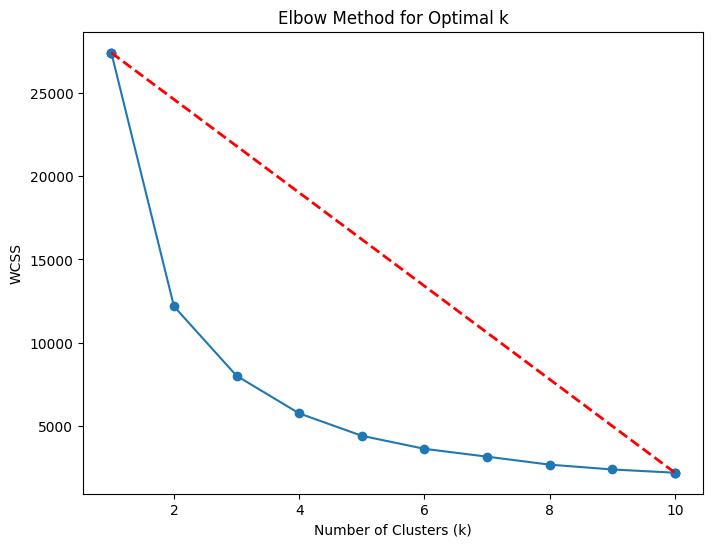

In [83]:
import matplotlib.pyplot as plt
def elbow_method(X, max_k=10):
    wcss = []
    
    # Run KMeans for each k from 1 to max_k
    for k in range(1, max_k + 1):
        _, _, wcss_value = k_means(X, k)
        wcss.append(wcss_value)
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    x1, y1 = 1, wcss[0]
    x2, y2 = 10, wcss[9]
    plt.plot([x1, x2], [y1, y2], color='red', linestyle='--', linewidth=2)
    plt.scatter([x1, x2], [y1, y2], color='blue')
    plt.show()

    return wcss

WCSS = elbow_method(lat_lon)




    




Find distance between the line and each point on the WCSS v/s k curve  
The k at which you get max distance is the best possible k.

In [ ]:
import numpy as np

# Function to calculate the distance from a point to a line (in 2D)
def point_to_line_distance(x0,y0,M=1,N=WCSS[0],X=10,Y=WCSS[len(WCSS)-1] ):
    distance = abs(((Y-N)/(M-X))*x0 + (M*Y-N*X) - y0)
      
    return distance

# Function to find the best k using the elbow method
def best_k(temp_wcss):
    distance = []
    
    # Iterate over all WCSS values to find the max distance from the line
    for i,wcss in enumerate(temp_wcss):
        dis = point_to_line_distance(i,wcss)
        distance.append(dis)
    
    r,_ = max(enumerate(distance))
    
    # Return the maximum distance (best k)
    return r



bestK = best_k(WCSS)





running k-means algorithm on our data frame

In [ ]:
import numpy as np
Centroids, Labels, Wcss = k_means(lat_lon, bestK)

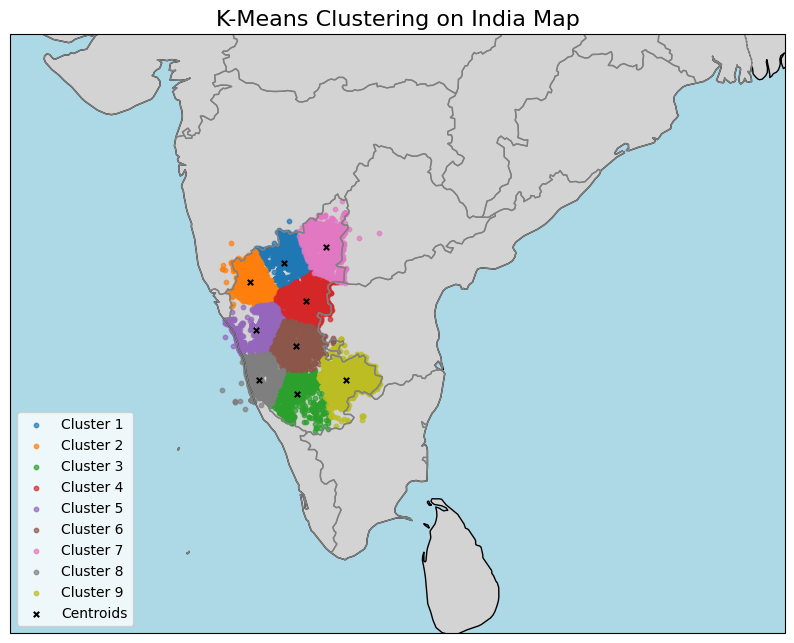

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Setup the Cartopy map
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 90, 6, 23], crs=ccrs.PlateCarree())  # Zoom to India

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='gray')

# Plot clusters
for i in range(bestK):
    cluster_points = lat_lon[Labels == i]
    ax.scatter(cluster_points[:, 1], cluster_points[:, 0],  # lon, lat order for Cartopy
               label=f'Cluster {i+1}', s=10, alpha=0.7)

# Plot centroids
ax.scatter(Centroids[:, 1], Centroids[:, 0],  # lon, lat
           marker='x', color='black', s=15, label='Centroids')

# Add title and legend
plt.title('K-Means Clustering on India Map', fontsize=16)
plt.legend(loc='lower left')
plt.show()
